In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 80.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import torch
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
model_type = "DPT_Large"     # MiDaS v3 - Large     (highest accuracy, slowest inference speed)
#model_type = "DPT_Hybrid"   # MiDaS v3 - Hybrid    (medium accuracy, medium inference speed)
#model_type = "MiDaS_small"  # MiDaS v2.1 - Small   (lowest accuracy, highest inference speed)
midas = torch.hub.load("intel-isl/MiDaS", model_type)

/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/intel-isl/MiDaS/zipball/master" to /root/.cache/torch/hub/master.zip
Downloading: "https://github.com/isl-org/MiDaS/releases/download/v3/dpt_large_384.pt" to /root/.cache/torch/hub/checkpoints/dpt_large_384.pt
100%|██████████| 1.28G/1.28G [00:13<00:00, 99.9MB/s]


In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()

In [ ]:
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
    transform = midas_transforms.dpt_transform
else:
    transform = midas_transforms.small_transform

Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


In [ ]:
from zipfile import ZipFile
import io

def getImageFromZip(zipobj, fname, imreadFlag):
  if fname in zipobj.namelist():
    image_data = zipobj.read(fname)
    image_buffer = io.BytesIO(image_data)
    return cv.imdecode(np.frombuffer(image_buffer.getvalue(), np.uint8), imreadFlag)
  else:
    raise ValueError("Error, given file does not exit")

In [ ]:
path = "drive/MyDrive/ENS491 Bitirme Projesi/Tests/"
zip_file = path+"rgbd-scene-time-lapses.zip"
zipf = ZipFile(zip_file, 'r')

In [ ]:
zipf.namelist()[:20]

['chess/TestSplit.txt',
 'chess/TrainSplit.txt',
 'chess/chess.png',
 'chess/seq-01/frame-000000.color.png',
 'chess/seq-01/frame-000000.depth.png',
 'chess/seq-01/frame-000000.pose.txt',
 'chess/seq-01/frame-000001.color.png',
 'chess/seq-01/frame-000001.depth.png',
 'chess/seq-01/frame-000001.pose.txt',
 'chess/seq-01/frame-000002.color.png',
 'chess/seq-01/frame-000002.depth.png',
 'chess/seq-01/frame-000002.pose.txt',
 'chess/seq-01/frame-000003.color.png',
 'chess/seq-01/frame-000003.depth.png',
 'chess/seq-01/frame-000003.pose.txt',
 'chess/seq-01/frame-000004.color.png',
 'chess/seq-01/frame-000004.depth.png',
 'chess/seq-01/frame-000004.pose.txt',
 'chess/seq-01/frame-000005.color.png',
 'chess/seq-01/frame-000005.depth.png']

In [ ]:
dimg = [getImageFromZip(zipf, f'chess/seq-01/frame-000{i}00.depth.png', cv.IMREAD_ANYDEPTH) for i in range(10)]
cimg = [getImageFromZip(zipf, f'chess/seq-01/frame-000{i}00.color.png', cv.IMREAD_COLOR) for i in range(10)]

In [ ]:
def predMidas(img):
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  input_batch = transform(img).to(device)
  with torch.no_grad():
    prediction = midas(input_batch)
    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()
  return prediction.cpu().numpy()

In [ ]:
k = predMidas(cimg[0])

In [ ]:
pimg = [predMidas(cimg[i]) for i in range(10)]

In [ ]:
def fitScale(depth, pred):
  # Read the two images
  imagex = pred
  imagey = depth
  # Convert the 8-bit image to 16-bit
  imagex_16bit = imagex.astype(np.int16)
  # Flatten the images
  flat_imagex = imagex_16bit.flatten()
  flat_imagey = imagey.flatten()
  # Concatenate the arrays to create a 2D array
  concatenated_array = np.stack((flat_imagey, flat_imagex), axis=1)
  # Filter out pairs containing 0 in the first element
  filtered_array = concatenated_array[concatenated_array[:, 0] != 0]
  # Perform linear regression
  coefficients = np.polyfit(filtered_array[:,1], filtered_array[:,0], 1)
  # Get the slope and intercept of the linear function
  slope, intercept = coefficients
  # Predict the values of image2 based on image1 using the linear function
  predicted_image = slope * filtered_array[:,1] + intercept
  # Calculate the error between the predicted values and the actual values
  error = np.mean((predicted_image - filtered_array[:,0]) ** 2) ** 0.5
  return (slope, intercept, error)

In [ ]:
sc = [fitScale(dimg[i], pimg[i]) for i in range(10)]

In [ ]:
for i in sc:
  print(i)

(-369.1215097386106, 9604.435101881252, 12098.395087166156)
(-83.44968645456598, 3181.9406408032164, 2948.923669515265)
(-32.67302860058628, 1623.1025592967835, 748.6714781987666)
(-38.25673737983733, 1888.3940146609455, 300.2968576145872)
(-368.23132544519007, 7949.055645672159, 6197.399087340396)
(-79.46546891394925, 2962.5377967035865, 1265.0729117116018)
(-62.19532333157149, 2296.041175275023, 298.7805882046286)
(-132.17300009183185, 4018.904574983434, 2663.0858283014472)
(-57.43709386203074, 1939.673264062814, 219.96793421729228)
(-225.5537993283825, 4338.843615026985, 5037.904335481275)


In [ ]:
def mapGtP(ground, s):
  return ((ground - s[1]) / s[0]).astype(np.int8)
def mapPtG(pred, s):
  return pred.astype(np.int16) * s[0] + s[1]

In [ ]:
def makeHist(img):
  hrange = 1<<12
  hbin = 1<<12
  histogram = cv.calcHist(images=[img], channels=[0], mask=None, histSize=[hbin], ranges=[1,hrange])
  return histogram

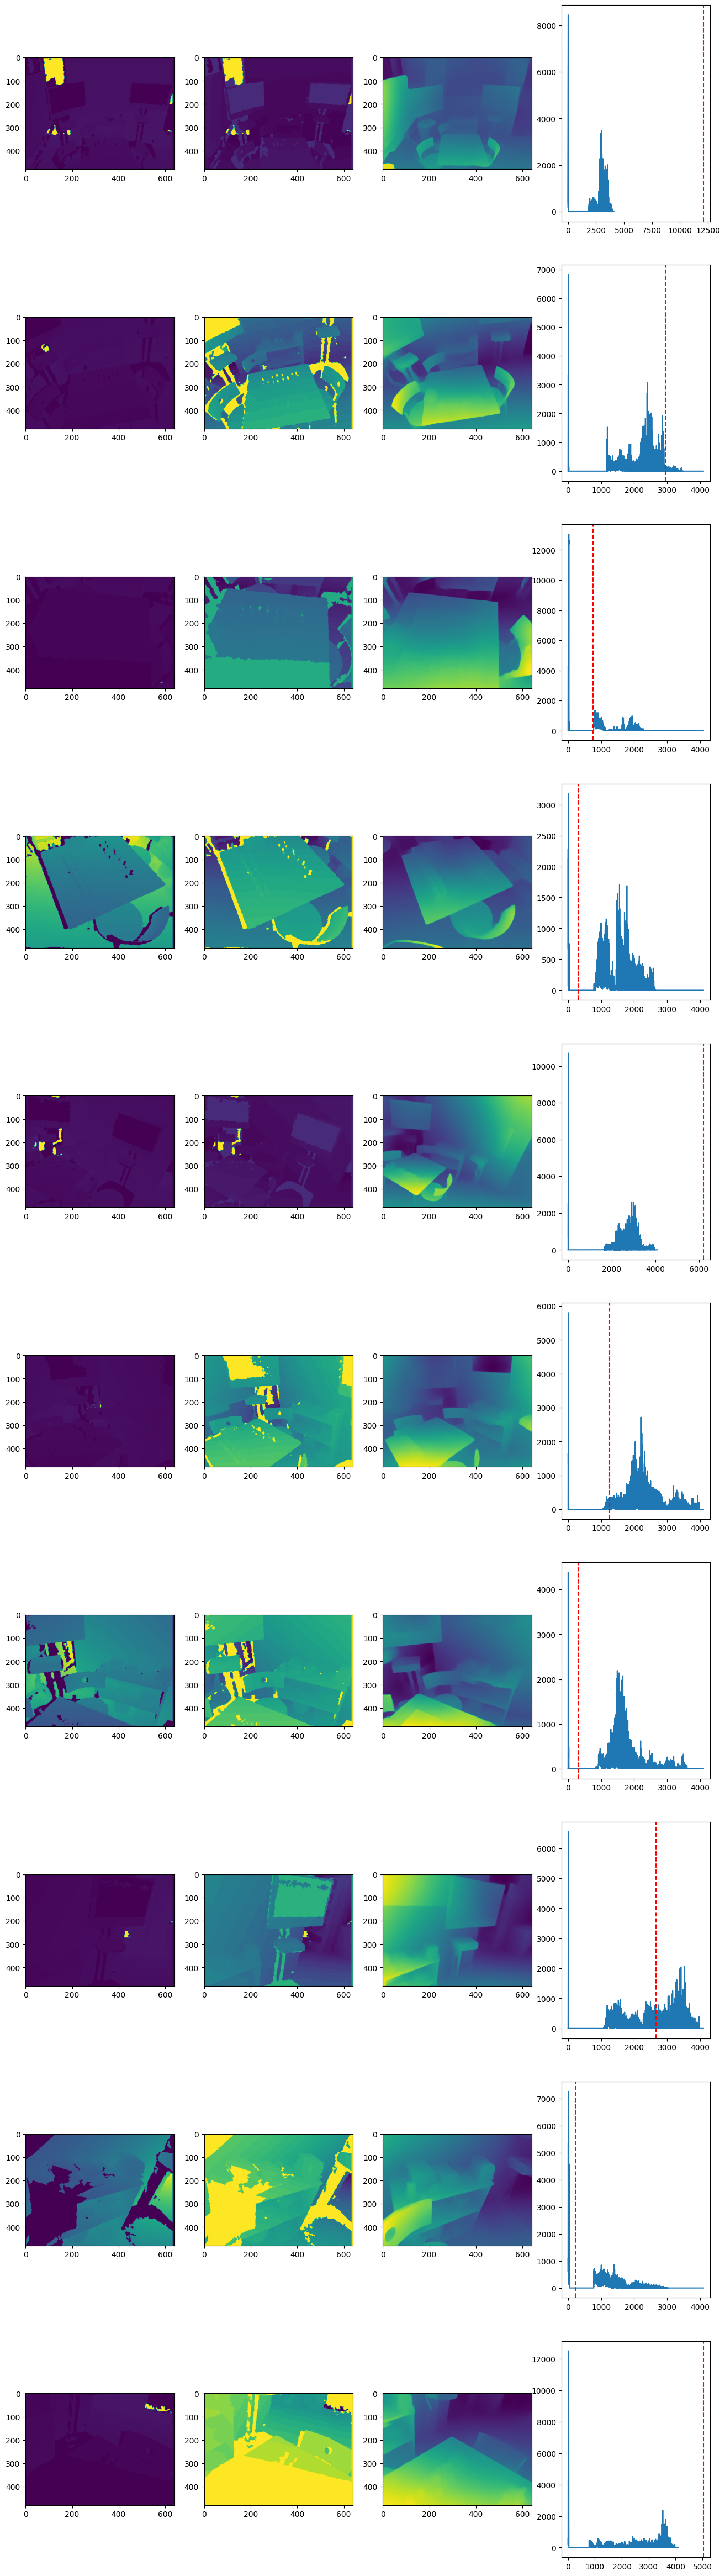

In [ ]:
def _p():
  f, axarr = plt.subplots(10,4,figsize=(16,6*10))
  for i in range(10):
    axarr[i,0].imshow(dimg[i])
    axarr[i,1].imshow(mapGtP(dimg[i],sc[i]))
    axarr[i,2].imshow(pimg[i])
    axarr[i,3].plot(makeHist(np.abs(dimg[i]-pimg[i])))
    axarr[i,3].axvline(x=sc[i][2]*(1), color='r', linestyle='--')
_p()

In [ ]:
for i in range(10):
  print(fitScale(dimg[i], pimg[i]))

(-369.1215097386106, 9604.435101881252, 12098.395087166156)
(-83.44968645456598, 3181.9406408032164, 2948.923669515265)
(-32.67302860058628, 1623.1025592967835, 748.6714781987666)
(-38.25673737983733, 1888.3940146609455, 300.2968576145872)
(-368.23132544519007, 7949.055645672159, 6197.399087340396)
(-79.46546891394925, 2962.5377967035865, 1265.0729117116018)
(-62.19532333157149, 2296.041175275023, 298.7805882046286)
(-132.17300009183185, 4018.904574983434, 2663.0858283014472)
(-57.43709386203074, 1939.673264062814, 219.96793421729228)
(-225.5537993283825, 4338.843615026985, 5037.904335481275)
